# A Simple Autoencoder

Have the network learn to recreate a single image.

Use matplotlib to show the images live as the network trains, but rather than just plotting loss or accuracy, we'll display the actual images that the network is generating.

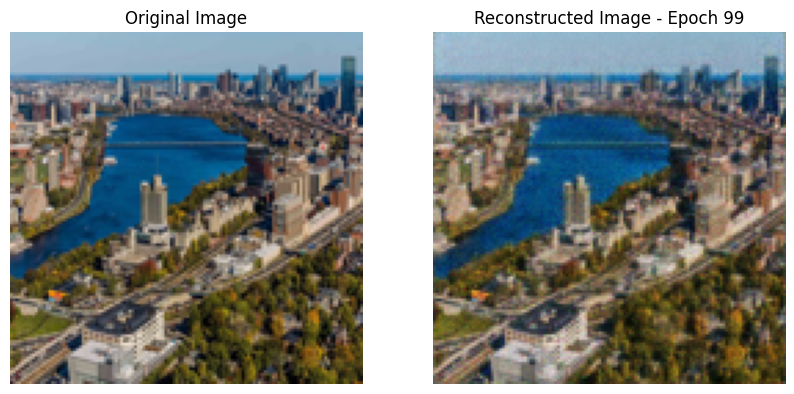

Epoch [100/100], Loss:0.0049


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from IPython.display import clear_output
from google.colab import files

# Upload the file
uploaded = files.upload()

# Define a dataset class for color images
class ColorImageDataset(Dataset):
    def __init__(self, image_path):
        self.image = Image.open(image_path).resize((128, 128))  # Resize to a manageable size
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def __len__(self):
        return 1  # Only one image to learn

    def __getitem__(self, idx):
        image_tensor = self.transform(self.image)
        return image_tensor, image_tensor

# Define a convolutional autoencoder for color images
class ColorConvAutoencoder(nn.Module):
    def __init__(self):
        super(ColorConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.ReLU(),
            # Flatten the output for the fully connected layer
            nn.Flatten(),
            nn.Linear(256*16*16, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 64)  # code layer
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256*16*16),
            nn.ReLU(),
            # Reshape back to a feature map
            Unflatten(256, 16, 16),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
            nn.Tanh()  # output a value between -1 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Unflatten layer to reshape tensor into a feature map
class Unflatten(nn.Module):
    def __init__(self, C, H, W):
        super(Unflatten, self).__init__()
        self.C = C
        self.H = H
        self.W = W

    def forward(self, x):
        return x.view(x.size(0), self.C, self.H, self.W)

# Function to display images live
def live_imshow(original, reconstructed, epoch):
    # Undo normalization
    original = original.detach().cpu().numpy().squeeze().transpose(1, 2, 0)
    original = (original * 0.5) + 0.5
    reconstructed = reconstructed.detach().cpu().numpy().squeeze().transpose(1, 2, 0)
    reconstructed = (reconstructed * 0.5) + 0.5
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original, cmap=None)
    axs[0].set_title('Original Image')
    axs[1].imshow(reconstructed, cmap=None)
    axs[1].set_title(f'Reconstructed Image - Epoch {epoch}')
    axs[0].axis('off')
    axs[1].axis('off')
    clear_output(wait=True)
    plt.show()

# Assume the uploaded image is named 'my_image.png'
image_path = next(iter(uploaded.keys()))

# Instantiate the dataset and data loader
dataset = ColorImageDataset(image_path)
dataloader = DataLoader(dataset, batch_size=1)

# Instantiate the model
autoencoder = ColorConvAutoencoder().cuda()  # Use GPU if available

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.cuda()  # Move data to GPU if available
        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Display images live
    live_imshow(img, output, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss:{loss.item():.4f}')


# **Something more complex**

- Have the capability to better capture the complex patterns in color images
- Add batch normalization to improve training stability and use more complex layers to enhance the model's learning capacity

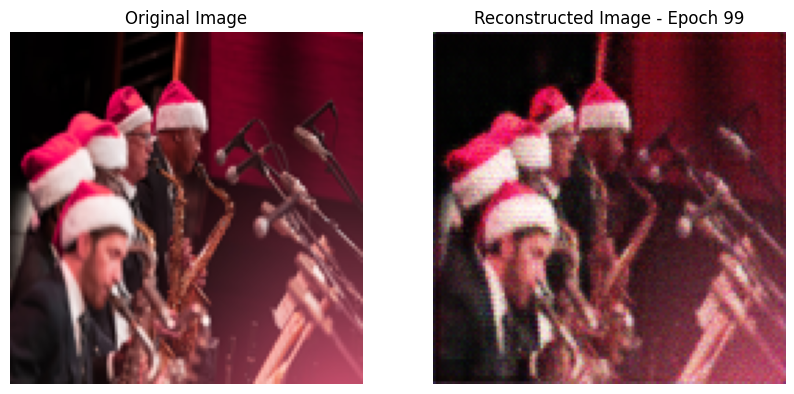

Epoch [100/100], Loss:0.0092


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from IPython.display import clear_output
from google.colab import files

# Upload the file
uploaded = files.upload()

# Define a dataset class for color images
class ColorImageDataset(Dataset):
    def __init__(self, image_path):
        self.image = Image.open(image_path).resize((128, 128))  # Resize to a manageable size
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def __len__(self):
        return 1  # Only one image to learn

    def __getitem__(self, idx):
        image_tensor = self.transform(self.image)
        return image_tensor, image_tensor

# Define a more advanced convolutional autoencoder
class AdvancedConvAutoencoder(nn.Module):
    def __init__(self):
        super(AdvancedConvAutoencoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 64x64
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),  # 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),  # 8x8
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256*8*8, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256)  # Code layer
        )
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256*8*8),
            nn.ReLU(),
            Unflatten(256, 8, 8),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),  # 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),  # 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),  # 64x64
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, stride=2, padding=1),  # 128x128
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Unflatten layer
class Unflatten(nn.Module):
    def __init__(self, C, H, W):
        super(Unflatten, self).__init__()
        self.C = C
        self.H = H
        self.W = W

    def forward(self, x):
        return x.view(x.size(0), self.C, self.H, self.W)

# Function to display images live
def live_imshow(original, reconstructed, epoch):
    original = original.detach().cpu().numpy().squeeze().transpose(1, 2, 0)
    original = (original * 0.5) + 0.5
    reconstructed = reconstructed.detach().cpu().numpy().squeeze().transpose(1, 2, 0)
    reconstructed = (reconstructed * 0.5) + 0.5
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original, cmap=None)
    axs[0].set_title('Original Image')
    axs[1].imshow(reconstructed, cmap=None)
    axs[1].set_title(f'Reconstructed Image - Epoch {epoch}')
    axs[0].axis('off')
    axs[1].axis('off')
    clear_output(wait=True)
    plt.show()

# Assume the uploaded image is named 'my_image.png'
image_path = next(iter(uploaded.keys()))

# Instantiate the dataset and data loader
dataset = ColorImageDataset(image_path)
dataloader = DataLoader(dataset, batch_size=1)

# Instantiate the model
autoencoder = AdvancedConvAutoencoder().cuda()  # Use GPU if available

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.cuda()  # Move data to GPU if available
        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Display images live
    live_imshow(img, output, epoch)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss:{loss.item():.4f}')
